In [1]:
import pandas as pd
from pathlib import Path

In [2]:
DATA_PATH = Path('./intermediate_datafiles/')
ORIG_DATASET_FNAME = 'chapter2_result.csv'

# Using the result from Chapter 2, let us try the Kalman filter on the light_phone_lux attribute and study the result.
try:
    original_dataset = pd.read_csv(
        DATA_PATH / ORIG_DATASET_FNAME, index_col=0)
    original_dataset.index = pd.to_datetime(original_dataset.index)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

In [3]:
original_dataset.head()

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,0.001667,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.041
2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,0.002333,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.132
2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,0.001824,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.282
2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,0.001956,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.369
2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,0.001896,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.268


In [21]:
import matplotlib.pyplot as plt

corr = original_dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,gyr_watch_y,gyr_watch_z,hr_watch_rate,labelOnTable,labelSitting,labelWashingHands,labelWalking,labelStanding,labelDriving,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure,miss
acc_phone_x,1.00,-0.05,-0.10,-0.18,0.10,0.25,0.00,-0.01,-0.01,0.03,-0.05,0.03,-0.20,-0.08,0.46,-0.08,-0.11,-0.14,0.28,-0.16,-0.05,-0.04,-0.63,-0.13,-0.04,-0.05,0.11,-0.04,0.12,0.03
acc_phone_y,-0.05,1.00,0.12,-0.08,0.15,0.02,0.01,-0.04,0.04,0.02,0.02,-0.03,0.04,0.05,-0.04,-0.02,0.08,0.04,0.06,0.16,-0.19,0.08,-0.02,-0.51,0.03,-0.05,-0.05,0.00,-0.20,0.09
acc_phone_z,-0.10,0.12,1.00,0.18,0.14,-0.34,-0.00,-0.00,-0.00,-0.02,0.04,-0.04,0.36,0.41,-0.37,-0.04,-0.16,-0.10,-0.11,-0.12,-0.03,0.14,0.02,-0.15,-0.52,0.04,0.12,-0.05,-0.20,-0.02
acc_watch_x,-0.18,-0.08,0.18,1.00,0.35,-0.20,-0.09,-0.06,-0.12,-0.03,-0.12,-0.04,0.35,0.40,-0.16,-0.01,0.39,-0.11,-0.41,-0.30,0.21,-0.00,0.15,-0.12,-0.18,-0.42,-0.05,0.16,-0.15,-0.10
acc_watch_y,0.10,0.15,0.14,0.35,1.00,0.23,-0.11,-0.04,-0.11,0.04,-0.14,-0.08,0.16,0.47,0.09,-0.08,0.11,-0.15,0.02,-0.10,-0.22,-0.03,-0.05,-0.44,-0.06,-0.16,0.00,-0.16,0.13,-0.04
acc_watch_z,0.25,0.02,-0.34,-0.20,0.23,1.00,0.01,0.04,0.04,-0.03,0.03,-0.01,-0.10,-0.16,0.34,-0.09,-0.00,-0.07,0.24,0.05,0.10,-0.17,-0.23,-0.05,0.18,-0.14,-0.04,-0.43,-0.03,0.04
gyr_phone_x,0.00,0.01,-0.00,-0.09,-0.11,0.01,1.00,0.17,0.34,0.08,0.19,0.29,0.02,-0.00,-0.00,0.01,0.00,0.00,-0.01,-0.00,0.02,0.00,-0.04,0.00,0.02,-0.01,0.00,-0.02,-0.00,-0.01
gyr_phone_y,-0.01,-0.04,-0.00,-0.06,-0.04,0.04,0.17,1.00,0.25,0.06,0.10,0.21,0.01,-0.00,-0.00,-0.00,0.01,0.01,-0.00,0.00,0.00,0.00,-0.01,0.01,-0.00,-0.03,-0.02,0.00,0.00,0.00
gyr_phone_z,-0.01,0.04,-0.00,-0.12,-0.11,0.04,0.34,0.25,1.00,0.11,0.12,0.35,0.01,0.00,0.00,0.01,0.02,0.00,0.01,0.01,-0.05,0.01,-0.01,-0.02,0.03,0.00,-0.01,0.01,0.02,-0.00
gyr_watch_x,0.03,0.02,-0.02,-0.03,0.04,-0.03,0.08,0.06,0.11,1.00,0.01,0.21,-0.06,0.01,0.01,-0.00,0.03,0.01,0.01,0.01,-0.18,-0.00,-0.01,-0.04,0.01,0.01,0.02,0.03,0.06,0.01


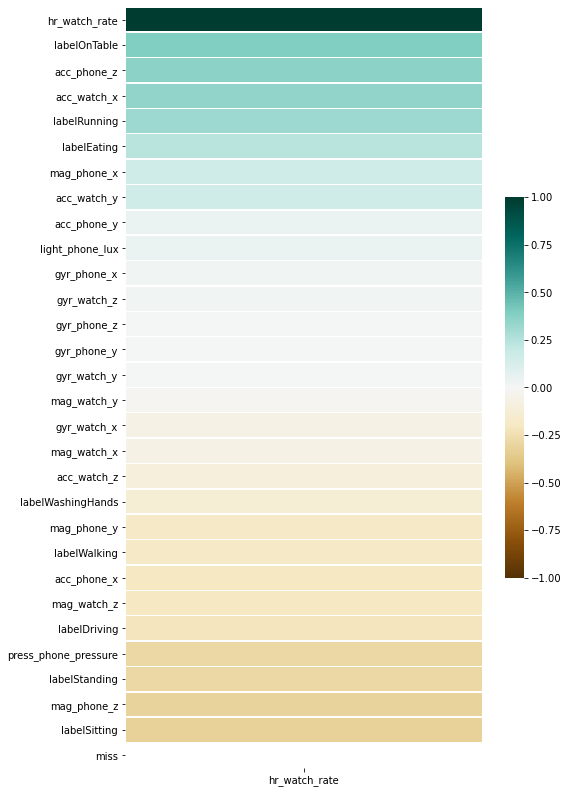

In [23]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 14))
sns_plot = sns.heatmap(original_dataset.corr()[[col]].sort_values(by=col, 
                               ascending=False), vmin=-1, vmax=1, cmap='BrBG',
                     linewidths=.5, cbar_kws={"shrink": .5})
sns_plot.figure.savefig('correlation.png', bbox_inches='tight')

['acc_phone_x' 'acc_phone_y' 'acc_phone_z' 'acc_watch_x' 'acc_watch_y'
 'acc_watch_z' 'gyr_phone_x' 'gyr_phone_y' 'gyr_phone_z' 'gyr_watch_x'
 'gyr_watch_y' 'gyr_watch_z' 'hr_watch_rate' 'labelOnTable' 'labelSitting'
 'labelWashingHands' 'labelWalking' 'labelStanding' 'labelDriving'
 'labelEating' 'labelRunning' 'light_phone_lux' 'mag_phone_x'
 'mag_phone_y' 'mag_phone_z' 'mag_watch_x' 'mag_watch_y' 'mag_watch_z'
 'press_phone_pressure' 'miss']


F:\Software\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


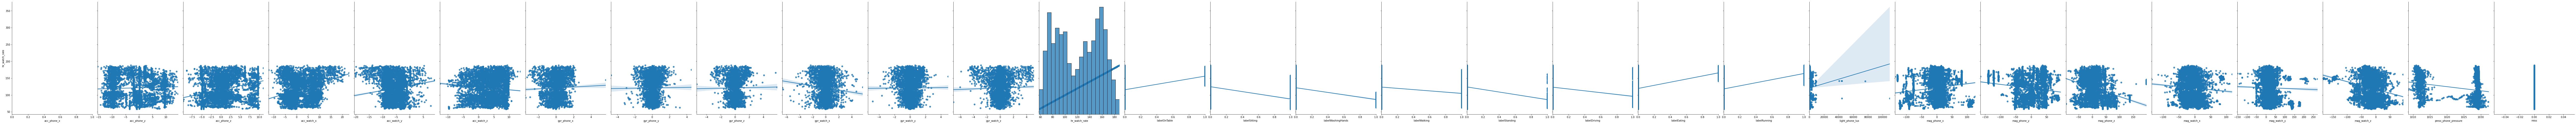

In [30]:
print(original_dataset.columns.values)
sns.pairplot(original_dataset, x_vars=original_dataset.columns.values, y_vars=col, size=7, aspect=0.7, kind='reg')

In [9]:
col = 'hr_watch_rate'
df_temp = original_dataset.dropna(axis=0)

row_idx_missing_hr = original_dataset[col].isnull()
data_missing_hr = pd.DataFrame(original_dataset[row_idx_missing_hr])
data_missing_hr.drop(col, axis=1, inplace=True)

col_means = data_missing_hr.mean(axis=0)
data_missing_hr = data_missing_hr.fillna(value = col_means)

print(data_missing_hr.isnull().any(axis = 1).sum())

0


In [6]:
print(original_dataset[col].values)
print(original_dataset[col].isnull().sum())

[nan nan nan ... nan nan nan]
24327


In [7]:
X = df_temp.drop(col, axis=1)
y = df_temp[col]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression().fit(X_train, y_train)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print(scores)

[0.6163975  0.60501358 0.58506851 0.65004178 0.641864   0.61883336
 0.60866452 0.63949301 0.6017742  0.61806673]


In [9]:
pred = lm.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.6362605055782606


In [19]:
pred = lm.predict(data_missing_hr)
print(pred)
# print(len(pred))
# print(row_idx_missing_hr.value_counts())

# print(len(original_dataset[row_idx_missing_hr]))

# print(original_dataset.loc[original_dataset[col] != 1])

# original_dataset.iloc[(original_dataset == row_idx_missing_hr).values, 1] = pred
original_dataset.loc[row_idx_missing_hr, col] = pred


[141.75183794 142.01560983 142.55671908 ... 136.61872044 136.89600185
 136.64725419]


In [15]:
print(original_dataset.columns)

Index(['acc_phone_x', 'acc_phone_y', 'acc_phone_z', 'acc_watch_x',
       'acc_watch_y', 'acc_watch_z', 'gyr_phone_x', 'gyr_phone_y',
       'gyr_phone_z', 'gyr_watch_x', 'gyr_watch_y', 'gyr_watch_z',
       'hr_watch_rate', 'labelOnTable', 'labelSitting', 'labelWashingHands',
       'labelWalking', 'labelStanding', 'labelDriving', 'labelEating',
       'labelRunning', 'light_phone_lux', 'mag_phone_x', 'mag_phone_y',
       'mag_phone_z', 'mag_watch_x', 'mag_watch_y', 'mag_watch_z',
       'press_phone_pressure'],
      dtype='object')


In [7]:
original_dataset['miss'] = row_idx_missing_hr
labels = ['labelOnTable', 'labelSitting', 'labelWashingHands',
       'labelWalking', 'labelStanding', 'labelDriving', 'labelEating',
       'labelRunning']

data = []
for label in labels:
    for miss in [False, True]:
        temp = original_dataset.loc[(original_dataset[label] == 1) & (original_dataset['miss'] == miss)][col].values
        data.append(temp)

In [13]:
# labels = ['labelOnTableTrue', 'labelOnTableFalse', 'labelSittingTrue','labelSittingFalse', 'labelWashingHandsTrue', 
#           'labelWashingHandsFalse', 'labelWalkingTrue', 'labelWalkingFalse', 'labelStandingTrue', 'labelStandingFalse', 
#           'labelDrivingTrue', 'labelDrivingFalse','labelEatingTrue', 'labelEatingFalse', 'labelRunningTrue', 'labelRunningFalse']

import numpy as np
from matplotlib.patches import Polygon
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Model based imputation',
    xlabel='Distribution',
    ylabel='Value',
)

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')
    
# Set the axes ranges and axes labels
# ax1.set_xlim(0.5, num_boxes + 0.5)
# top = 40
# bottom = -5
# ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(labels, 2),
                    rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, 'Heart rate original',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'Heart rate imputed',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='small')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

plt.show()

NameError: name 'plt' is not defined